# Лабораторная работа по Вычислительной Математике

## Задачa 11
Сравнить численные решения, полученные по разностным схемам Лакса, Куранта-Изаксона-Риса, Лакса-Вендоффа, Уорминга-Кутлера-Ломакса <br>для уравнения переноса в недивергентной и дивергентной формах:

$$\frac{∂ u}{∂ t} + u\frac{∂ u}{∂ x} = 0,$$

$$\frac{∂ u}{∂ t} + \frac{∂ (u^2/2)}{∂ x} = 0$$

Исследовать сходимость численных решений по сетке (при $h → 0$, где $h$ $-$ шаг сетки)
<br>Начальные профили из условия задачи:

<p align=center><img src="./profile.png" height=300 width=800></p>

## Разностные схемы
Запишем уравнение переноса в виде:

$$\frac{∂ u}{∂ t} + u\frac{∂ u}{∂ x} ≡ \frac{∂ u}{∂ t} + \frac{∂ (u^2 / 2)}{∂ x} = \frac{∂ u}{∂ t} + \frac{∂ f}{∂ x} = 0$$

**Схема Лакса**

$$\frac{u^{n+1}_m - 0.5(u^n_{m+1} + u^n_{m-1})}{\tau} + \frac{f^n_{m+1} - f^n_{m-1}}{h} = 0$$

Порядок аппроксимации схемы: $O(\tau + h)$

**Схема Куранта - Изаксона - Риса**

$$\frac{u^{n+1}_m - u^n_m}{\tau} + \frac{f^n_{m+1} - f^n_m}{h} = 0, \hspace{1cm} u^n_m < 0,$$
$$\frac{u^{n+1}_m - u^n_m}{\tau} + \frac{f^n_m - f^n_{m-1}}{h} = 0, \hspace{1cm} u^n_m > 0$$

Порядок аппроксимации схемы: $O(\tau + h)$

**Схема Лакса-Вендоффа**

*1 шаг*
$$\frac{u^{n+1/2}_{m+1/2} - 0.5(u^n_{m+1} + u^n_{m-1})}{\tau /2} + \frac{f^n_{m+1} - f^n_m}{h} = 0,$$
$$\frac{u^{n+1/2}_{m-1/2} - 0.5(u^n_{m+1} + u^n_{m-1})}{\tau /2} + \frac{f^n_m - f^n_{m-1}}{h} = 0$$
*2 шаг*
$$\frac{u^{n+1}_m + u^n_m}{\tau} + \frac{f^{n+1/2}_{m+1/2} - f^{n+1/2}_{m-1/2}}{h} = 0$$

Порядок аппроксимации схемы: $O(\tau ^2 + h^2)$

**Схема Уорминга-Кутлера-Ломакса**

*1 шаг*
$$\frac{u^{n+1/3}_m + u^n_m}{2\tau /3} + \frac{f^n_{m+1} - f^n_m}{h^2} = 0,$$
$$\frac{u^{n-1/3}_m + u^n_m}{2\tau /3} + \frac{f^n_m - f^n_{m-1}}{h^2} = 0$$
*2 шаг*
$$\frac{u^{n+2/3}_m + 0.5(u^n_m + u^{n+1/3}_m)}{\tau /2} + \frac{f^{n+1/3}_m - f^{n+1/3}_{m-1}}{h^2} = 0,$$
$$\frac{u^{n+2/3}_m + 0.5(u^n_m + u^{n+1/3}_m)}{\tau /2} + \frac{f^{n+1/3}_{m+1} - f^{n+1/3}_m}{h^2} = 0$$
*3 шаг*
$$\frac{u^{n+1}_m + u^n_m}{\tau} + \frac{3}{8}\frac{f^{n+1/3}_{m+1} - f^{n+1/3}_{m-1}}{h} + \frac{-2f^n_{m-2} + 7f^n_{m-1} - 7f^n_{m+1} + 2f^n_{m+2}}{h} + \frac{\omega}{24}(u^n_{m-2} - 4u^n_{m-1} + 6u^n_m - 4u^n_{m+1} + u^n_{m+2}) = 0,$$

где $\omega$ выбирается из условия: $4\sigma^2 - \sigma^4 < \omega < 3$ 

Порядок аппроксимации схемы: $O(\tau ^3 + h^3)$

### Устойчивость
Устойчивость разностных схем решения уравнения переноса определяется условием на число Куранта $\sigma$:

$$\sigma = \tau/h ≤ 1$$

При решении дивергентного уравнения переноса условие на число Куранта принимает следующий вид:

$$\frac{\tau}{h} |\max_{m} u^n_m| ≤ 1$$

$$\frac{u^n_m - u^n_{m-1}}{\tau} = 0$$

## Ход работы

Для нашей задачи выберем $H = 1$, $l =3$, $L = 7$, $X = 10$, $T = 10$.

In [31]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm


H = 1
l = 3
L = 7
X = 10
T = 10

def calc_sigma (ts, xs, u):
	return ts/xs*np.max(u)

def calc_initial_t (t):
	if t < l or t >= L:
		return 0
	if t >= l and t < (l+L)/2:
		return (2*H/(L-l))*(t-l)
	if t >= (l+L)/2 and t < L:
		return -(2*H/(L-l))*(t-L)

def calc_initial_x (x):
    # return 1/((np.cosh(x-2))**2) - 1/(np.cosh(-2))**2
	if x < l or x >= L:
		return 0
	if x >= l and x < L:
		return H

def left_angel(ud, udl, xs, ts):
    return ts * (ud**2 - udl**2)/(2*xs) + ud

def sceme_L(udl, udr, xs, ts):
    return (udl**2 - udr**2) * ts / (2 * xs) + 0.5*(udr + udl)

def scheme_LF(ud, udl, udr, xs, ts):
    uar = 0.5*(udr+ud) - (udr**2-ud**2)*ts/(4 * xs) 
    ual = 0.5*(ud+udl) - (ud**2-udl**2)*ts/(4 * xs)
    return (ud - ((uar**2 - ual**2) * ts) / (2 * xs))

def sceme_CIR(ud, udl, xs, ts):
    return sp.solveset((x - ud)/ts - (ud*ud - udl * udl)/xs, x)

# def sceme_LF(ud, udl, xs, ts):
#     return sp.solveset((x - ud)/ts - (ud*ud - udl * udl)/xs, x)

# def sceme_WCL(ud, udl, xs, ts):
#     return sp.solveset((x - ud)/ts - (ud*ud - udl * udl)/xs, x)

ts = 0.005
xs = 0.05

Nx = int(X/xs)+1
Nt = int(T/ts)+1

# print(Nx, Nt)

# Инициализация начальных данных сетки
u = np.full((Nt,Nx), 0)
u[0,:] = np.linspace(0,X,Nx)
u[:,0] = np.linspace(0,T,Nt)
for i in range (0, Nx):
	u[0,i] = calc_initial_x(u[0,i])
for i in range (0, Nt):
    u[i,0] = calc_initial_t(u[i,0])
# print(u)

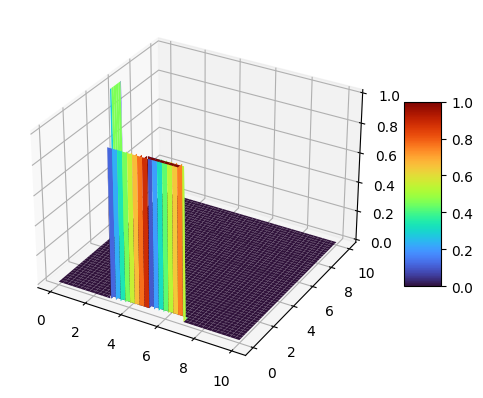

In [32]:
# Решения схемой LF
L = u.copy()

for i in range (1, Nt):
	for j in range (1,Nx):
		if (j != Nx-1):
			L[i,j] = scheme_LF(L[i-1, j], L[i-1,j-1],L[i-1,j+1],xs,ts)
		else:
			L[i,j] = left_angel(L[i-1,j],L[i-1,j-1],xs,ts)
   
# print(L)

# Сохранение данных в таблицу excel
df = pd.DataFrame(data=L)
df.to_excel("L.xlsx")

# Создание 3D графика
x = np.linspace(0, X, Nx)
t = np.linspace(0, T, Nt)

xx, yy = np.meshgrid(x, t)

fig, ax = plt.subplots(subplot_kw = {"projection" : "3d" })
surf = ax.plot_surface(xx, yy, np.array(L), cmap = cm.turbo, linewidth = 0, antialiased = True)
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()